In [1]:
!pip install 'dtreeviz'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import time

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz.trees as dtreeviz

#modelos y métricas
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, precision_recall_curve, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler

#configuración warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#Se carga el dataset sobre el cual vamos a trabajar:

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
# Convertir los datos en un DataFrame de pandas
ds_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
#Mostramos las primeras filas del dataset iris
ds_iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#Análisis exploratorio

Listar la cantidad de filas y columnas que tiene el dataset



In [6]:
ds_iris.shape

(150, 4)

Este dataset contiene 150 filas y 5 columnas

Listar los nombres de las columnas del dataset

In [7]:
ds_iris.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Descripcion de los campos (Continuara)...

# Preprocesamiento


Anlizamos la proporcion de datos nulos de cada atributo

In [8]:
filas_totales=ds_iris.shape[0]
print(ds_iris.isna().sum()/filas_totales*100)

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64


In [9]:
ds_trabajo = ds_iris.copy()

Para un dataset como este, no hay mucho mas preprocesamiento que hacer.

#1. Entrenar un árbol de decisión para el conjunto de datos de Iris.

A su mismo vez, usamos la palabra reservada "criterion" para utilizar el hiperparámetro Gini que es la medida de cuán a menudo un elemento elegido
aleatoriamente del conjunto sería etiquetado incorrectamente si fue etiquetado de manera aleatoria de acuerdo a la distribución de las etiquetas en el subconjunto.

In [10]:
#Creo un clasificador
tree_model = tree.DecisionTreeClassifier(criterion = "gini",max_depth = 2)

#2. Partir el conjunto Iris en dos: “entrenamiento” y “prueba”, dejando un 25% del conjunto original para pruebas.

Vimos que 'species' es una variable categórica. Como es de costumbre, a las variables categóricas se le aplica one hot encoding ya que los arboles, solo aceptan variables numéricas como variables de entrada. Sin embargo, este no es el caso ya que 'species' por lo que pide el enunciado, es la variable 'target'.

In [11]:
#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo

#Creo un dataset con la variable target
ds_trabajo_y = iris.target

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, ds_trabajo_y, test_size=0.25,random_state = 42) #semilla
#test_size = 0.25 indica que el 25% del conjunto de datos, se asignará al conjunto de prueba y el otro 75% restante se asignará al conjunto de entrenamiento.

Datos de entrenamiento de entrada:

In [12]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,6.0,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


Datos de entrenamiento de salida:

In [13]:
y_train

array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])

Datos de pruebas de entrada:

In [14]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


Y los datos de pruebas de salida:

In [15]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

#3. Imprimir la precisión (accuracy_score), para ambos conjuntos.

##Calculo las métricas (Incluyendo el accuracy) para los datos de entrenamiento tanto tambien de test y vemos que sale:

In [16]:
start_time = time.time()

In [17]:
#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

In [18]:
end_time = time.time()

In [19]:
training_time_gini = end_time - start_time

Primero vamos a realizar una predicción:

In [20]:
#Realizamos una predicción sobre el set de entrenamiento
y_pred_train = model.predict(x_train)

Y ahora vamos a calcular las metricas para el conjunto de entrenamiento:

In [21]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_train,y_pred_train)
recall=recall_score(y_train,y_pred_train, average='micro')
f1=f1_score(y_train,y_pred_train, average='micro')
precision=precision_score(y_train,y_pred_train, average='micro')

print("Accuracy del entrenamiento: "+str(accuracy))
print("Recall del entrenamiento: "+str(recall))
print("Precision del entrenamiento: "+str(precision))
print("f1 score del entrenamiento: "+str(f1))

Accuracy del entrenamiento: 0.9464285714285714
Recall del entrenamiento: 0.9464285714285714
Precision del entrenamiento: 0.9464285714285714
f1 score del entrenamiento: 0.9464285714285714


Será que esto da 'Overfitting'?

Ahora calculemos las metricas para el conjunto de prueba repitiendo el primer paso que es hacer una prediccion sobre esta vez, el conjunto de prueba:

In [22]:
#Realizamos una predicción sobre el set de prueba
y_pred_test = model.predict(x_test)

In [23]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred_test)
recall=recall_score(y_test,y_pred_test, average = 'micro')
f1=f1_score(y_test,y_pred_test, average = 'micro')
precision=precision_score(y_test,y_pred_test, average = 'micro')

print("Accuracy del test: "+str(accuracy))
print("Recall del test: "+str(recall))
print("Precision del test: "+str(precision))
print("f1 score del test: "+str(f1))

Accuracy del test: 0.9736842105263158
Recall del test: 0.9736842105263158
Precision del test: 0.9736842105263158
f1 score del test: 0.9736842105263158


Conclusion: Los resultados que has obtenido muestran un buen rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba. Las métricas de precisión, recall y f1-score son muy similares en ambos conjuntos, lo que sugiere que el modelo está generalizando bien a datos no vistos.

El hecho de que las métricas en el conjunto de prueba sean muy cercanas a las del conjunto de entrenamiento es una señal positiva, ya que indica que el modelo está generalizando correctamente a nuevos datos.

Además, el hecho de que todas las métricas (accuracy, recall, precision y f1-score) tengan valores similares sugiere que el modelo tiene un buen equilibrio entre la capacidad para clasificar correctamente las clases positivas (recall) y la precisión para evitar clasificar incorrectamente clases negativas como positivas (precision).

#4. Graficar el árbol de decisión.

In [24]:
model.classes_

array([0, 1, 2])

In [25]:
class_names = {0: "setosa", 1: "versicolor", 2: "virginica"}

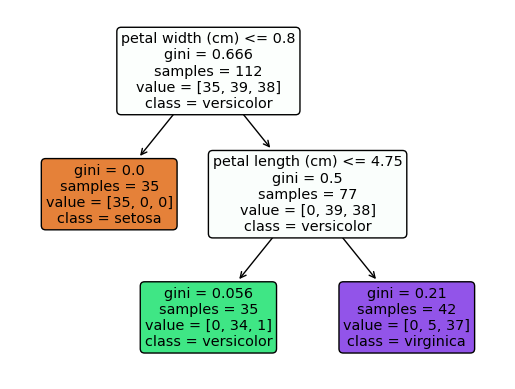

In [26]:
tree_plot=tree.plot_tree(model,
                         max_depth=2,
                         feature_names=ds_trabajo_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names= class_names)

plt.show(tree_plot)

#5. Volver a calcular el árbol cambiando el hiperparámetro: criterion para que use la entropía en lugar de la impureza de Gini.

In [27]:
#Creo un clasificador
tree_model = tree.DecisionTreeClassifier(criterion = "entropy",max_depth = 2)

#Creo un dataset con los features que voy a usar para clasificar
ds_trabajo_x=ds_trabajo

#Creo un dataset con la variable target
ds_trabajo_y = iris.target

#Genero los conjuntos de train y test
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x, ds_trabajo_y, test_size=0.25,random_state=42) #semilla
#test_size = 0.25 indica que el 25% del conjunto de datos, se asignará al conjunto de prueba y el otro 75% restante se asignará al conjunto de entrenamiento.

In [28]:
start_time = time.time()

In [29]:
#Entrenamos el modelo
model = tree_model.fit(X = x_train, y = y_train)

In [30]:
end_time = time.time()

In [31]:
training_time_entropy = end_time - start_time

In [32]:
#Realizamos una predicción sobre el set de entrenamiento
y_pred_train = model.predict(x_train)

##a. ¿Cúal da mejor resultado?

In [33]:
#Calculo las métricas en el conjunto de entrenamiento
accuracy=accuracy_score(y_train,y_pred_train)
recall=recall_score(y_train,y_pred_train, average='micro')
f1=f1_score(y_train,y_pred_train, average='micro')
precision=precision_score(y_train,y_pred_train, average='micro')

print("Accuracy del entrenamiento: "+str(accuracy))
print("Recall del entrenamiento: "+str(recall))
print("Precision del entrenamiento: "+str(precision))
print("f1 score del entrenamiento: "+str(f1))

Accuracy del entrenamiento: 0.9464285714285714
Recall del entrenamiento: 0.9464285714285714
Precision del entrenamiento: 0.9464285714285714
f1 score del entrenamiento: 0.9464285714285714


In [34]:
#Realizamos una predicción sobre el set de prueba
y_pred_test = model.predict(x_test)

#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred_test)
recall=recall_score(y_test,y_pred_test, average = 'micro')
f1=f1_score(y_test,y_pred_test, average = 'micro')
precision=precision_score(y_test,y_pred_test, average = 'micro')

print("Accuracy del test: "+str(accuracy))
print("Recall del test: "+str(recall))
print("Precision del test: "+str(precision))
print("f1 score del test: "+str(f1))

Accuracy del test: 0.9736842105263158
Recall del test: 0.9736842105263158
Precision del test: 0.9736842105263158
f1 score del test: 0.9736842105263158


Respuesta a): Ninguno de los dos arboles con diferentes criterios (Tanto Gini como Entropia) dar mejor o peores metricas. Ambos arboles dan resultados de metricas iguales y por lo tanto se podria decir, que el resultado es el mismo.

##b. ¿Cambió el tiempo de entrenamiento?

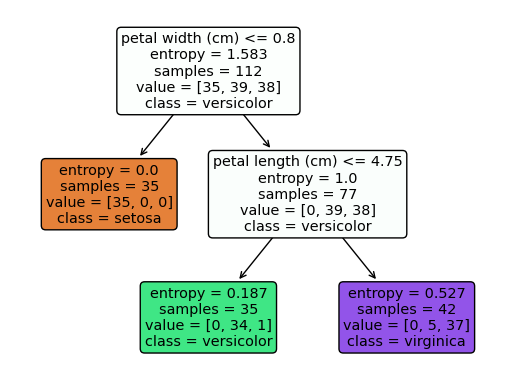

In [35]:
model.classes_

class_names = {0: "setosa", 1: "versicolor", 2: "virginica"}

tree_plot=tree.plot_tree(model,
                         max_depth=2,
                         feature_names=ds_trabajo_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names= class_names)

plt.show(tree_plot)

In [36]:
print("Tiempo de entrenamiento con criterio Gini: ",training_time_gini)
print("Tiempo de entrenamiento con criterio Entropía: ",training_time_entropy)

Tiempo de entrenamiento con criterio Gini:  2.730456590652466
Tiempo de entrenamiento con criterio Entropía:  2.8210856914520264


Por lo tanto, si cambio el tiempo de entrenamiento y llegamos a la conclusión que con el criterio Gini el tiempo de entrenamiento, fue más rápido.

#6. Entrenar un modelo RandomForest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
# Crear el clasificador Random Forest
rfc_default = RandomForestClassifier()

Mostramos los mejores parametros:

In [63]:
rfc_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
start_time = time.time()

In [65]:

#Entrenamos el modelo
modelo = rfc_default.fit(x_train,y_train)

#Realizamos una predicción sobre el set de entrenamiento
y_pred_train = modelo.predict(x_train)

#Realizamos una predicción sobre el set de prueba
y_pred_test = modelo.predict(x_test)

In [66]:
end_time = time.time()

In [67]:
training_time_rf1 = end_time - start_time

##a. Calcular la precision (Y todas las demas metricas)

In [68]:
#Calculo las métricas en el conjunto de entrenamiento
accuracy=accuracy_score(y_train,y_pred_train)
recall=recall_score(y_train,y_pred_train, average='micro')
f1=f1_score(y_train,y_pred_train, average='micro')
precision=precision_score(y_train,y_pred_train, average='micro')

print("Accuracy del entrenamiento: "+str(accuracy))
print("Recall del entrenamiento: "+str(recall))
print("Precision del entrenamiento: "+str(precision))
print("f1 score del entrenamiento: "+str(f1))

Accuracy del entrenamiento: 1.0
Recall del entrenamiento: 1.0
Precision del entrenamiento: 1.0
f1 score del entrenamiento: 1.0


In [69]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred_test)
recall=recall_score(y_test,y_pred_test, average = 'micro')
f1=f1_score(y_test,y_pred_test, average = 'micro')
precision=precision_score(y_test,y_pred_test, average = 'micro')

print("Accuracy del test: "+str(accuracy))
print("Recall del test: "+str(recall))
print("Precision del test: "+str(precision))
print("f1 score del test: "+str(f1))

Accuracy del test: 1.0
Recall del test: 1.0
Precision del test: 1.0
f1 score del test: 1.0


#b. Calcular la matriz de confusión

Text(50.722222222222214, 0.5, 'True')

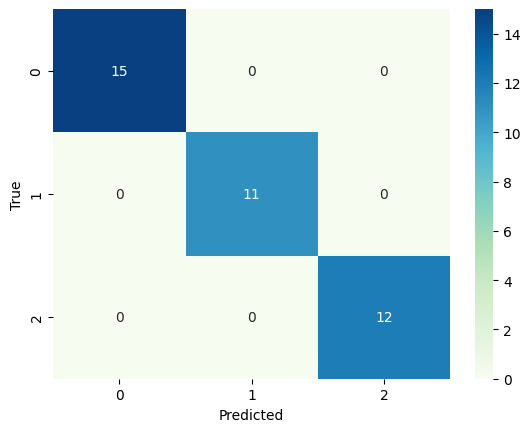

In [70]:
#Creo la matriz de confusión
tabla=confusion_matrix(y_test, y_pred_test)

#Grafico la matriz de confusión
sns.heatmap(tabla,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

Siendo 0: Setosa; 1: Versicolor; 2: Virginica.

#c. Comparar con los árboles anteriores

Para comparar los arboles anteriores con el modelo RF, podemos utilizar las métricas utilizadas anteriormente (Accuracy, Recall, Precision, F1 Score). Entonces con las metricas ya utilizadas en las versiones anteriores (Criterio de Gini, Criterio de Entropia, modelo RF) vemos que el modelo RF da mejores metricas que las versiones de los arboles con criterio Gini y Entropia. Esto claramente marca la superioridad que tiene el modelo RF por encima de los arboles individuales con criterio Gini y Entropía.
Recordemos que el modelo Random Forest es una técnica de ensamble que combina varios árboles de decisión, lo que permite mejorar la precisión y reducir el sobreajuste en comparación con un solo arbol.

#d. Cambiar el hiperparámetro n_estimators dejarlo igual 10.

##i. ¿Mejoró o empeoró el modelo?

In [71]:
start_time = time.time()

In [72]:
# Crear el clasificador Random Forest
rfc_default = RandomForestClassifier(n_estimators = 10)

#Entrenamos el modelo
modelo = rfc_default.fit(x_train,y_train)

#Realizamos una predicción sobre el set de entrenamiento
y_pred_train = modelo.predict(x_train)

#Realizamos una predicción sobre el set de prueba
y_pred_test = modelo.predict(x_test)

In [73]:
end_time = time.time()

In [74]:
training_time_rf2 = end_time - start_time

In [75]:
#Calculo las métricas en el conjunto de entrenamiento
accuracy=accuracy_score(y_train,y_pred_train)
recall=recall_score(y_train,y_pred_train, average='micro')
f1=f1_score(y_train,y_pred_train, average='micro')
precision=precision_score(y_train,y_pred_train, average='micro')

print("Accuracy del entrenamiento: "+str(accuracy))
print("Recall del entrenamiento: "+str(recall))
print("Precision del entrenamiento: "+str(precision))
print("f1 score del entrenamiento: "+str(f1))

Accuracy del entrenamiento: 0.9910714285714286
Recall del entrenamiento: 0.9910714285714286
Precision del entrenamiento: 0.9910714285714286
f1 score del entrenamiento: 0.9910714285714286


In [76]:
#Calculo las métricas en el conjunto de evaluación
accuracy=accuracy_score(y_test,y_pred_test)
recall=recall_score(y_test,y_pred_test, average = 'micro')
f1=f1_score(y_test,y_pred_test, average = 'micro')
precision=precision_score(y_test,y_pred_test, average = 'micro')

print("Accuracy del test: "+str(accuracy))
print("Recall del test: "+str(recall))
print("Precision del test: "+str(precision))
print("f1 score del test: "+str(f1))

Accuracy del test: 1.0
Recall del test: 1.0
Precision del test: 1.0
f1 score del test: 1.0


Según las métricas, con n_estimators = 10 las metricas del conjunto de entrenamiento empeoran un poquito pero no hay mucha diferencia. Mientras que en las métricas del conjunto de prueba no cambia absolutamente nada.

##ii. ¿Cambió el tiempo de entrenamiento?

In [77]:
print("Tiempo de entrenamiento del modelo Random Forest 1: ",training_time_rf1)
print("Tiempo de entrenamiento del modelo Random Forest 2: ",training_time_rf2)

Tiempo de entrenamiento del modelo Random Forest 1:  4.853724479675293
Tiempo de entrenamiento del modelo Random Forest 2:  4.2961180210113525
